# **MINOR PROJECT**

---






# **TASK 1** - Exploratory Data Analysis

In [ ]:
#----------code
!wget heart.csv

--2023-07-03 13:59:58--  http://heart.csv/
Resolving heart.csv (heart.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘heart.csv’


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.environ['KAGGLE_USERNAME']="jyotiaggarwal2"
os.environ['KAGGLE_KEY']="ad5ef957479ae2bdd2fcaef088635410"
!kaggle datasets download -d fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 23.3MB/s]


In [ ]:
!unzip heart-failure-prediction.zip

Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [ ]:
data=pd.read_csv('/content/heart.csv',encoding='latin',)

**Q1: Are there any missing values in the dataset? If so, how will you handle them? What is the distribution of heart disease and normal cases in the dataset? Is the dataset balanced or imbalanced?**

In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data['HeartDisease'].nunique()

2

In [ ]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

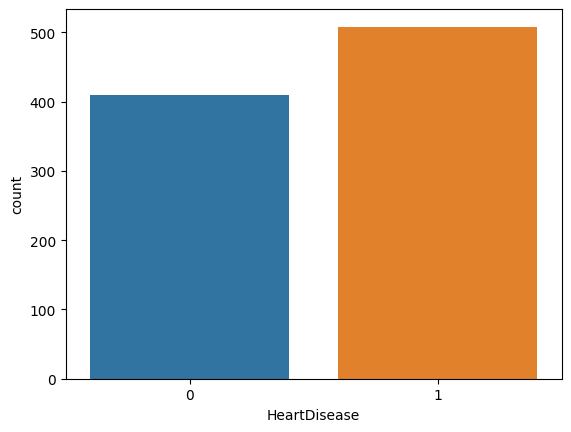

In [ ]:
sns.countplot(x = data['HeartDisease'])

In [ ]:
sns.histplot(x = data['HeartDisease'])

In [ ]:
plt.hist(data['HeartDisease'], bins=10)
plt.xlabel("0 = No disease,   1 = Disease")
plt.ylabel("Frequency of Occurence of heart disease")
plt.show()

In [ ]:
occurence_frequency = (data['HeartDisease'].value_counts())/len(data)
occurence_frequency

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

**Analysis and observation:**
****
- There are no missing values in the dataset. However missing values in the dataset can be handled by dropping row, dropping column or estimate filling.
- Distribution of heart disease is 55.33% whereas normal cases contribute 44.66%
- Since percentage of heart cases is more than the normal cases, hence the data is imbalanced.

**Q2: How does the occurrence of heart disease vary with different input features (age, gender, hypertension, diabetes, etc.)? Create visualizations such as bar plots or boxplots to compare their distributions?**

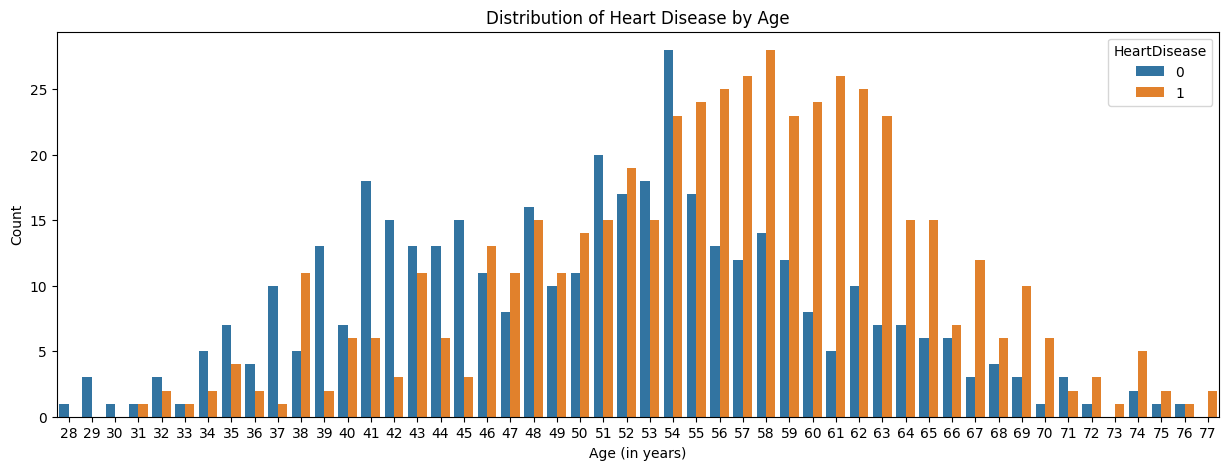

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Age', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Age')
plt.xlabel("Age (in years)")
plt.ylabel("Count")
plt.show()

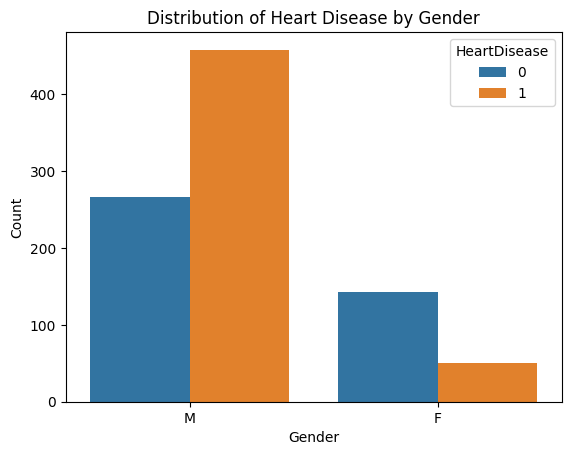

In [ ]:
sns.countplot(x='Sex', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

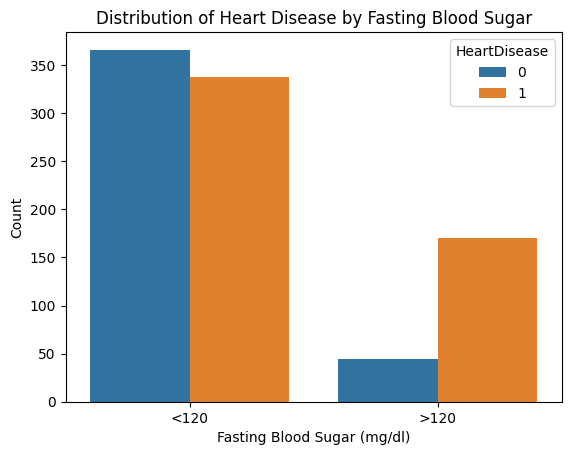

In [ ]:
sns.countplot(x='FastingBS', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (mg/dl)')
plt.ylabel('Count')
plt.xticks([0, 1], ['<120', '>120'])
plt.show()

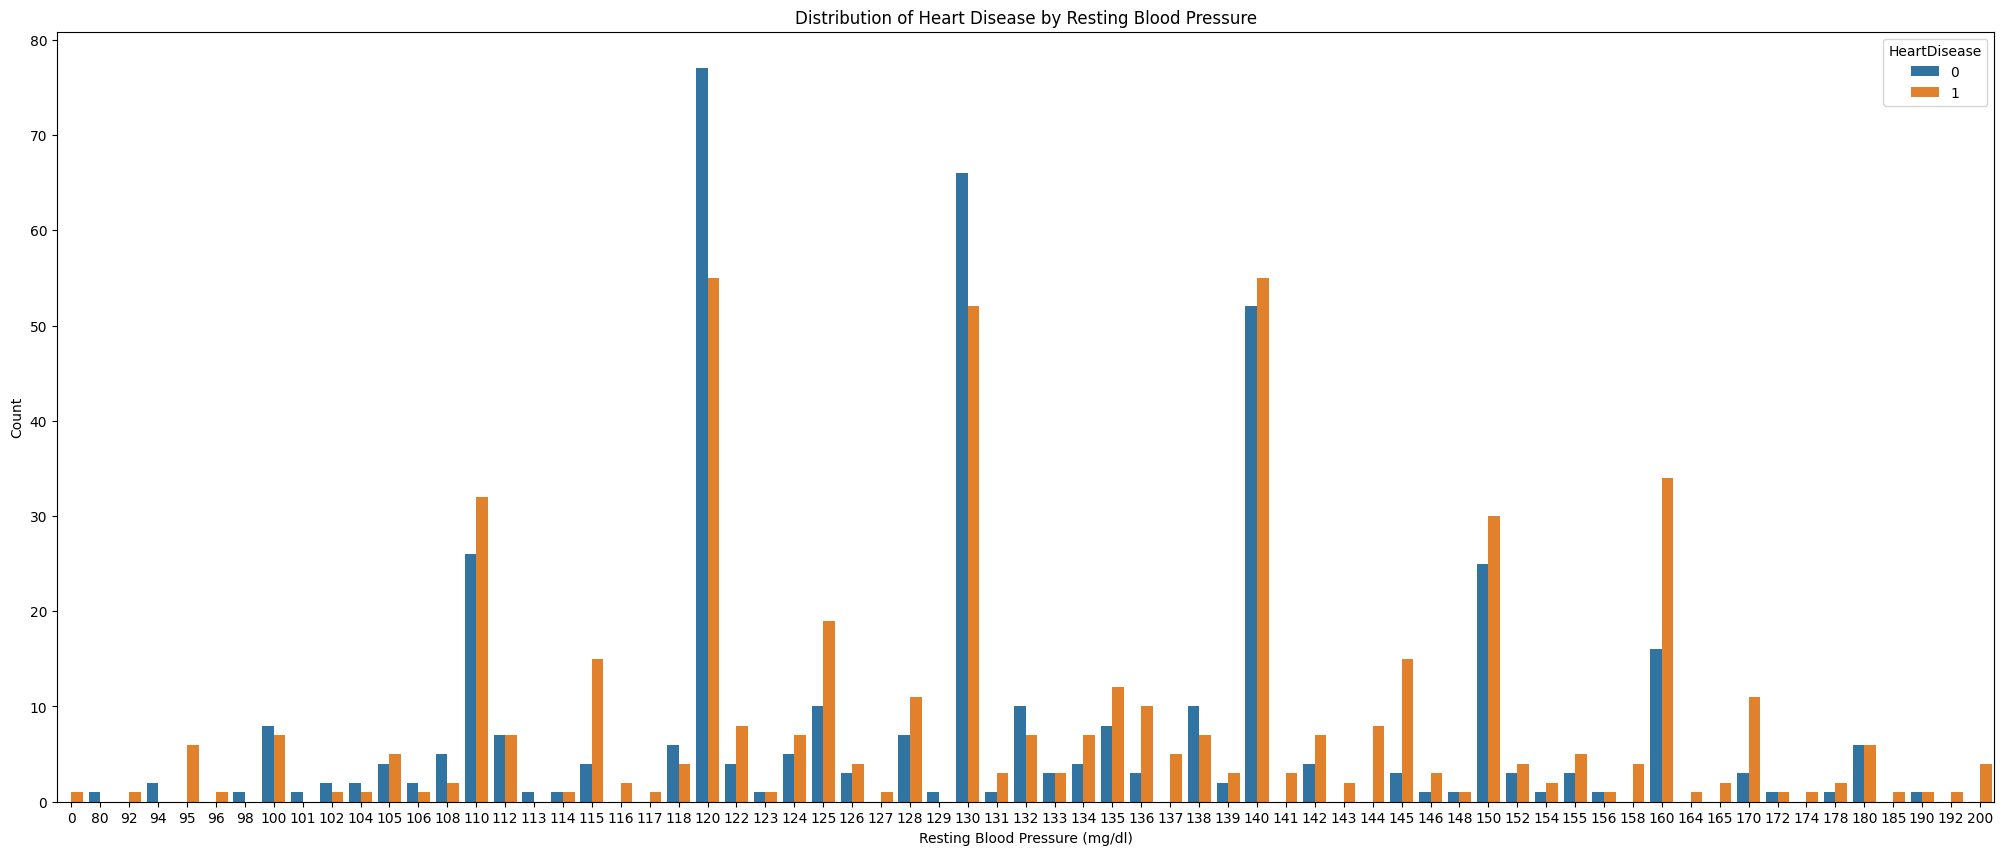

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot(x='RestingBP', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mg/dl)')
plt.ylabel('Count')
plt.show()

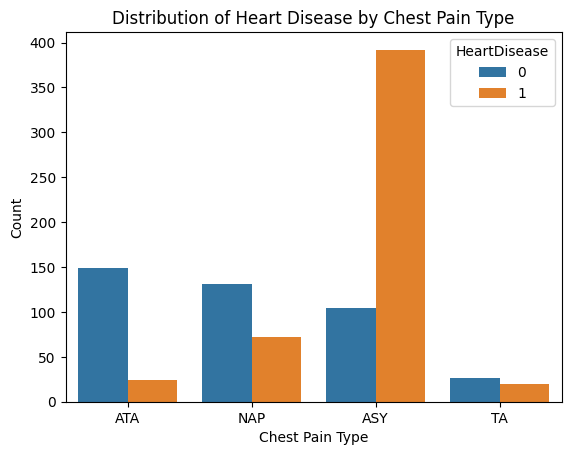

In [ ]:
sns.countplot(x='ChestPainType', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

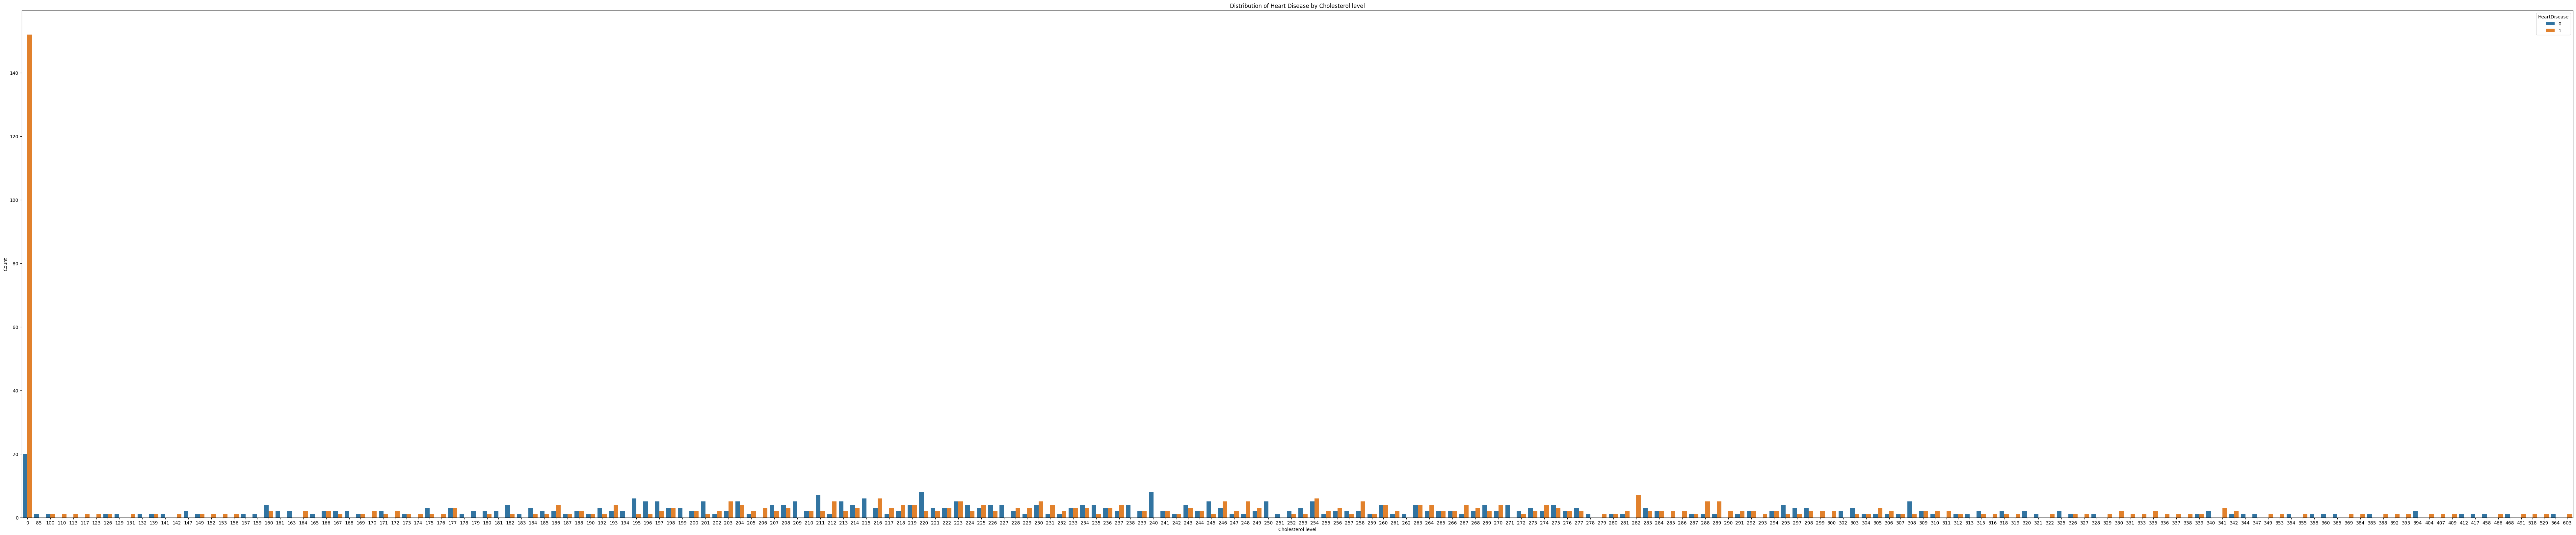

In [ ]:
plt.figure(figsize=(100,20))
sns.countplot(x='Cholesterol', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Cholesterol level')
plt.xlabel('Cholesterol level')
plt.ylabel('Count')
plt.show()

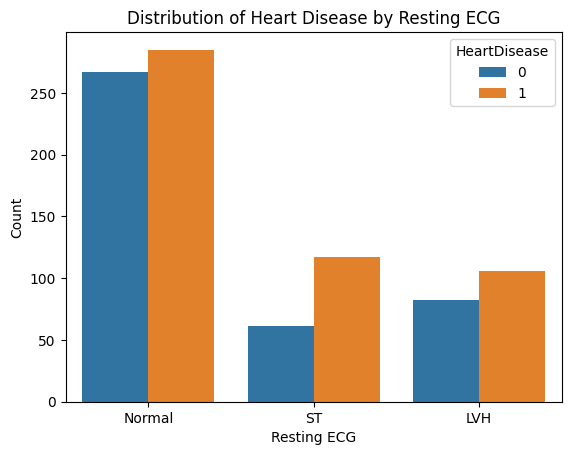

In [ ]:
sns.countplot(x='RestingECG', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Resting ECG')
plt.xlabel('Resting ECG')
plt.ylabel('Count')
plt.show()

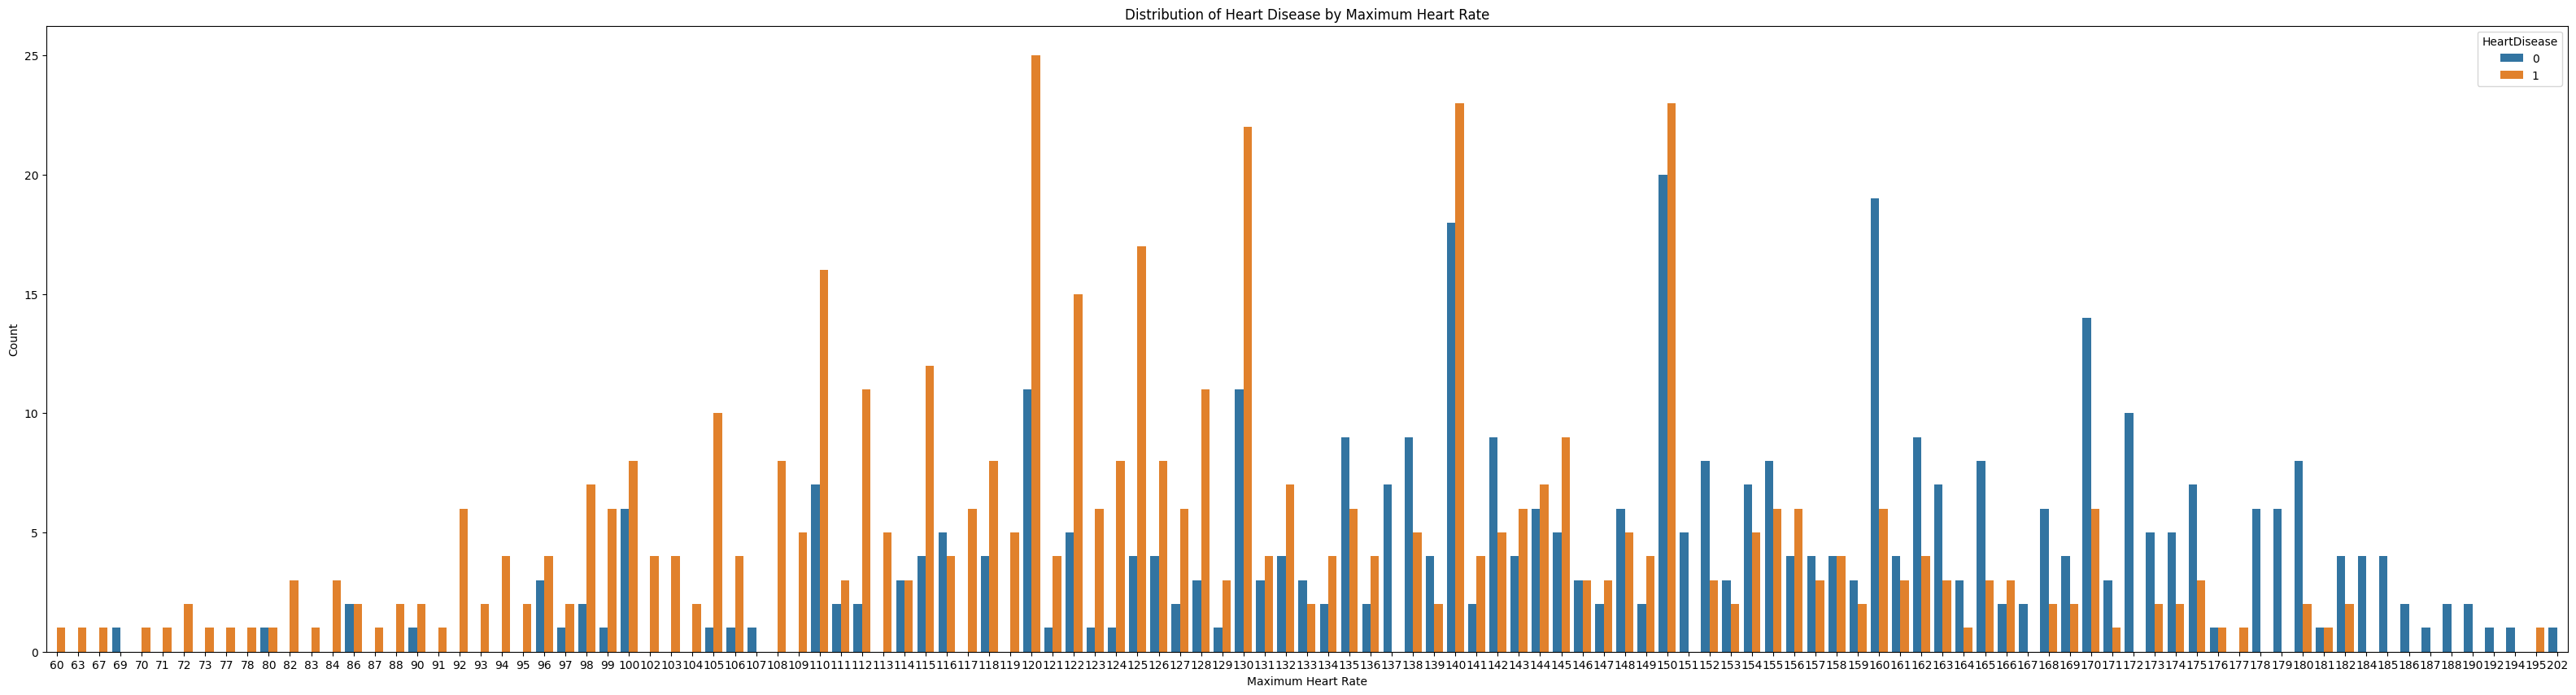

In [ ]:
plt.figure(figsize=(40,10))
sns.countplot(x='MaxHR', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Maximum Heart Rate')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Count')
plt.show()

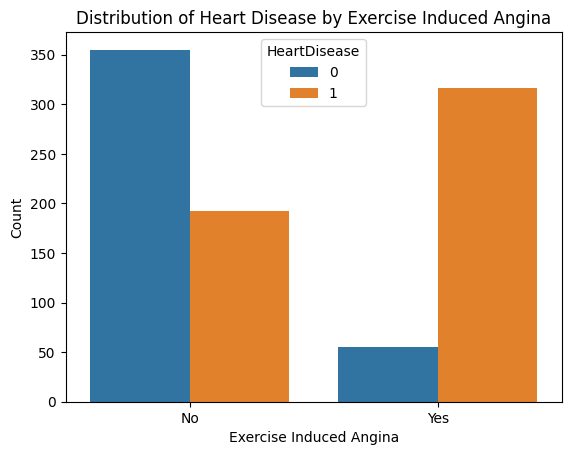

In [ ]:
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

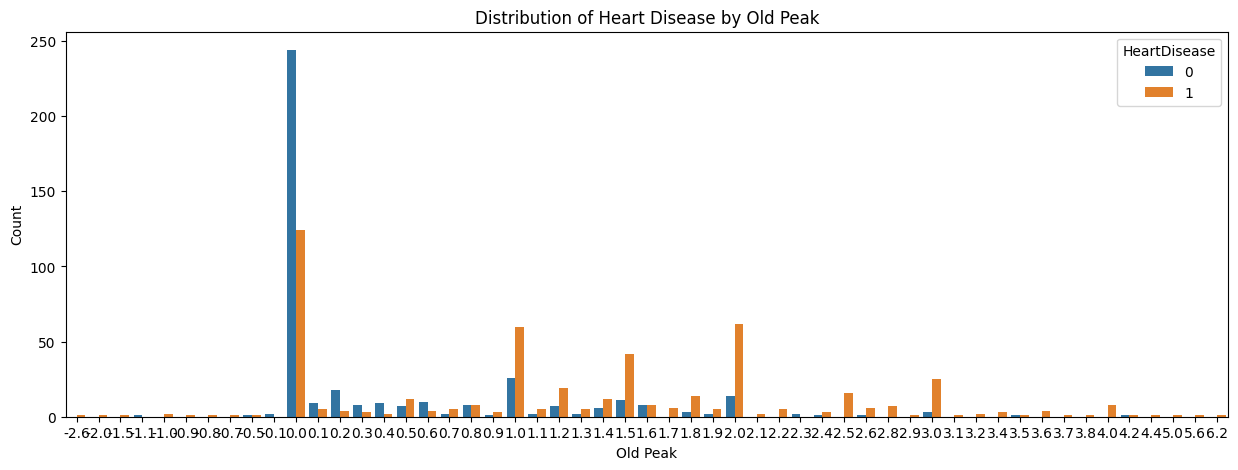

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='Oldpeak', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by Old Peak')
plt.xlabel('Old Peak')
plt.ylabel('Count')
plt.show()

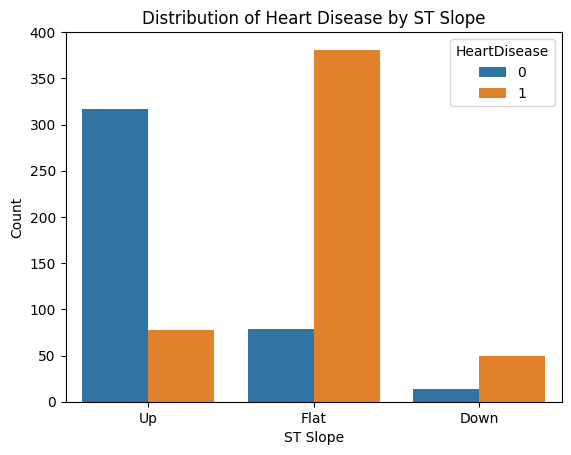

In [ ]:
sns.countplot(x='ST_Slope', hue='HeartDisease', data=data)
plt.title('Distribution of Heart Disease by ST Slope')
plt.xlabel('ST Slope')
plt.ylabel('Count')
plt.show()

**Analysis and observation:**
****
Variation of occurrence of heart disease with different input features (age, gender, hypertension, diabetes, etc.) is studied with the help of count plot visualisation.

- Occurence of heart disease is maximum at 58 years of age.
- There is more probability of heart disease in males.
- Number of people having heart disease are more among people having fasting blood sugar level > 120 mg/dl.
- Most of the people having resting blood pressure 120 mg/dl are free from heart disease.
- People having ASY type of chest pain are more prone to heart disease.

**Q3: Can you identify any outliers in the dataset, particularly for numerical features like age, resting blood pressure, cholesterol levels, maximum heart rate achieved, and oldpeak? How are you planning to handle them?**

In [ ]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

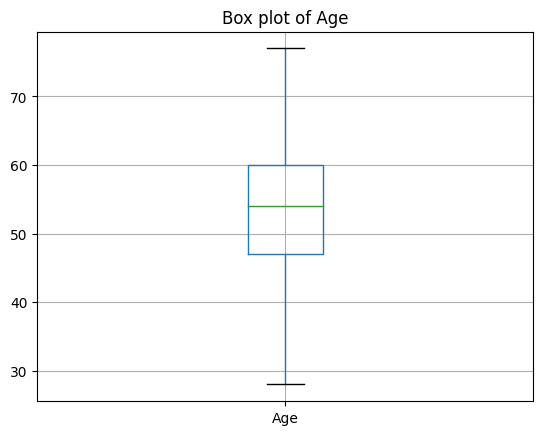

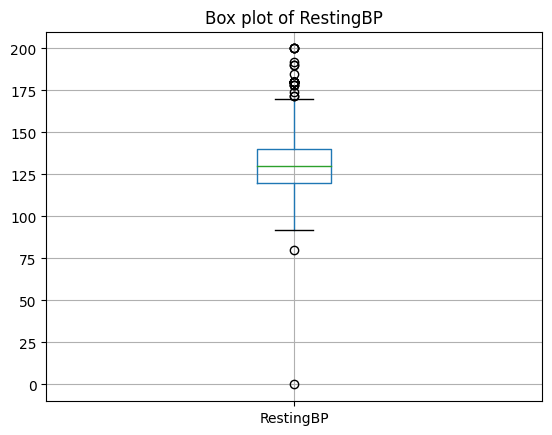

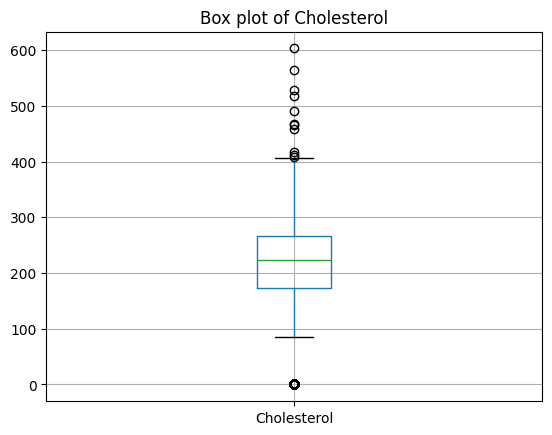

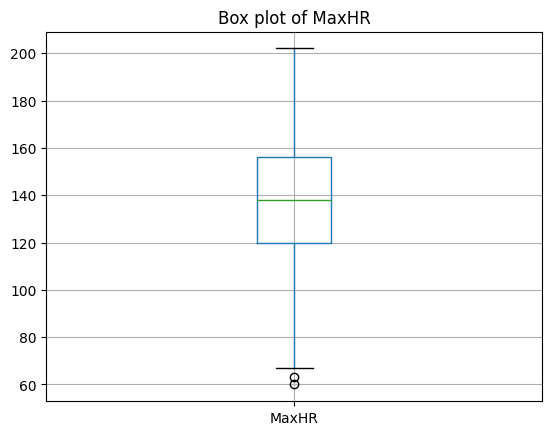

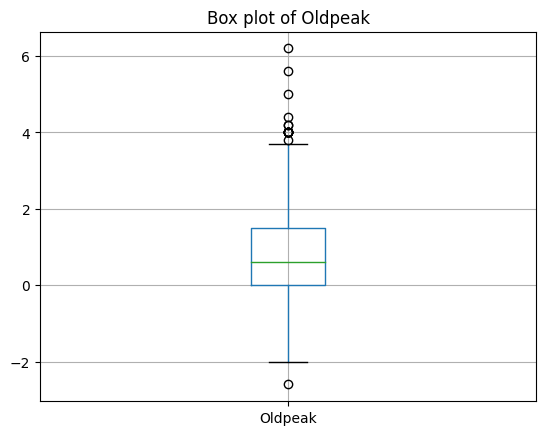

In [ ]:
# Visualize box plots for each numerical feature
for feature in numerical_features:
    plt.figure()
    data.boxplot(column=feature)
    plt.title(f'Box plot of {feature}')
    plt.show()

In [ ]:
# Calculate summary statistics
summary_stats = data[numerical_features].describe()
summary_stats

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


In [ ]:
# Calculate z-scores for each numerical feature
z_scores = (data[numerical_features] - data[numerical_features].mean()) / data[numerical_features].std()

In [ ]:
# Identify potential outliers based on z-scores
threshold = 3  # Adjust the threshold as per requirement
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Print the indices of potential outliers
for feature in numerical_features:
    feature_outliers = outliers[outliers[feature]].index
    print(f'Potential outliers in {feature}: {list(feature_outliers)}')

Potential outliers in Age: []
Potential outliers in RestingBP: [109, 241, 365, 399, 449, 592, 732, 759]
Potential outliers in Cholesterol: [76, 149, 616]
Potential outliers in MaxHR: [390]
Potential outliers in Oldpeak: [166, 324, 702, 771, 791, 850, 900]


**Analysis and observation:**
****
It is clearly visible that there is potential errors in given numerical features except age.
These outliers in the dataset can be handled by replacing extreme values with values closer to the central distribution.

**Q4: Are there any correlations between the different features and the presence of heart disease? Visualize it using a heatmap or correlation matrix. Determine if any feature(s) can be dropped based on their relationship with the target variable.**

<ipython-input-21-ddbdec6ba315>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


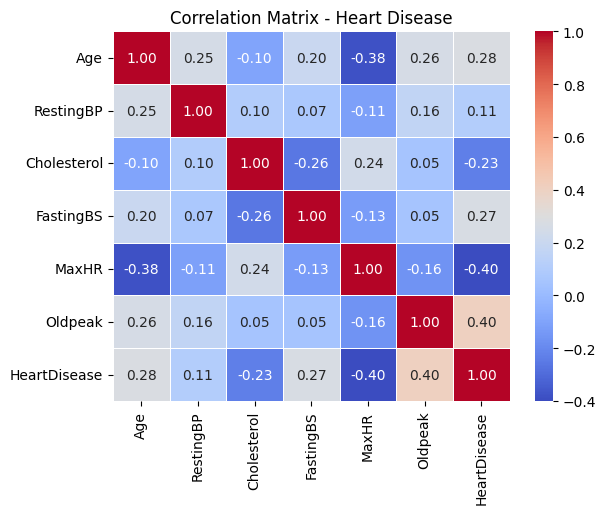

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Heart Disease')
plt.show()


**Analysis and observation:**
****
After visualizing the heatmap, the correlations between features and the presence of heart disease can be correlated.

Features with higher absolute correlation coefficients (closer to 1 or -1) such as Age, RestingBP are more strongly related to the target variable and hence cannot be dropped.
However features with very low correlation coefficients (close to 0) such as Max HR, Old peak don't provide much predictive power for heart disease and hence can be dropped.

**Q5: Can you perform feature encoding or transformation on categorical variables like sex, chest pain type, resting ECG, and exercise-induced angina? Which encoding technique would be most suitable?**

In [ ]:
# Perform one-hot encoding on categorical variables
encoded_data = pd.get_dummies(data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina'])

# Show the encoded dataframe
print(encoded_data.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak ST_Slope  \
0   40        140          289          0    172      0.0       Up   
1   49        160          180          0    156      1.0     Flat   
2   37        130          283          0     98      0.0       Up   
3   48        138          214          0    108      1.5     Flat   
4   54        150          195          0    122      0.0       Up   

   HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  \
0             0      0      1                  0                  1   
1             1      1      0                  0                  0   
2             0      0      1                  0                  1   
3             1      1      0                  1                  0   
4             0      0      1                  0                  0   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0                  0                 0               0                  1  

**Analysis and observation:**
****
Yes, feature encoding or transformation can be performed on categorical variables like sex, chest pain type, resting ECG, and exercise-induced angina to convert them into numerical representations.

One of the most suitable encoding technique is one-hot encoding, which creates binary columns for each category of a categorical variable.

# **TASK 2** - Classification/Regression

Perform following steps on the same dataset which you used for EDA.
> - Data Preprocessing (as per requirement)
> - Feature Engineering
> - Split dataset in train-test (80:20 ratio)
> - Model selection
> - Model training
> - Model evaluation
> - Fine-tune the Model
> - Make predictions

Summarize your model's performance by evaluation metrices



### **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('heart.csv')

In [ ]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in the dataset. However missing values in the dataset can be handled by dropping row, dropping column or estimate filling.

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
columns_to_drop = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data = data.drop(columns_to_drop, axis=1)

print(data.dtypes)

Age               int64
RestingBP         int64
Cholesterol       int64
FastingBS         int64
MaxHR             int64
Oldpeak         float64
HeartDisease      int64
dtype: object


### **Split dataset in train-test (80:20 ratio)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train , test = train_test_split(data , test_size=0.2, random_state = 42)

In [ ]:
X_train = train.drop(['HeartDisease'],1)
X_test = test.drop(['HeartDisease'],1)

Y_train = train['HeartDisease']
Y_test = test['HeartDisease']

<ipython-input-228-18f9664b5303>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = train.drop(['HeartDisease'],1)
<ipython-input-228-18f9664b5303>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = test.drop(['HeartDisease'],1)


In [ ]:
X_train.shape, Y_train.shape

((734, 6), (734,))

In [ ]:
X_test.shape , Y_test.shape

((184, 6), (184,))

**Creating a model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

 **Training the model**

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

**Checking model accuracy**

In [ ]:
model.score(X_train, Y_train)

0.779291553133515

The training accuracy of model is 77.92%

**Model evaluation**

In [ ]:
model.score(X_test,Y_test)

0.7391304347826086

The test accuracy of model is 73.91%

**Make predictions**

In [ ]:
predict = model.predict(X_test)
predict

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1])

**Model evaluation using metrics**

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(predict,Y_test)

0.7391304347826086

**Analysis and observation:**
****
These metrics help in evaluating how well the model predicts the target variable based on the input features.
After evaluation, thhe accuracy of our model is 73.91%.

## **Evaluation Metrices**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
accuracy_score(predict,Y_test)

0.7391304347826086

In [ ]:
recall_score(predict,Y_test,average='micro')

0.7391304347826086

In [ ]:
f1_score(predict,Y_test,average='micro')

0.7391304347826085

In [ ]:
precision_score(predict,Y_test,average='micro')

0.7391304347826086

The accuracy of model is 73.91%

## **Fine tune the model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
train , test = train_test_split(data , test_size=0.2, random_state = 42)
model = RandomForestRegressor()
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=2)
grid_search.fit(X_train, Y_train)
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 300}


In [ ]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, Y_test)

In [ ]:
test_score

0.26810053396044997

After fine tuning the model, the accuracy of model get decreased to 26.81% hence fine tuning of data is not required.

The accuracy of model is 73.91% which is quite descent as compared to 26.81%
